In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import netCDF4
import xarray as xr
import hmp
from pathlib import Path
import matplotlib.pyplot as plt
import itertools
import multiprocessing
import os
import random
import mne
from tqdm.notebook import tqdm
DATA_PATH = Path(os.getenv("DATA_PATH"))

#### New version

In [2]:
sfreq = 250  # For resampling

eeg_path = DATA_PATH / "sat2/preprocessed_500hz/"
subj_names = [
    x.split("_")[0] for x in os.listdir(eeg_path)
]  # in x and 'S14' not in x] #pbm with
subj_names = [subj for subj in subj_names]
subj_names.sort()
# subj_names = ['S11', 'S9', 'S10']
# subj_names = [subj for subj in subj_names if subj in ['S9', 'S10', 'S11']]
subj_files = [str(eeg_path) + "/" + x + "_epo.fif" for x in subj_names]

Processing participant /workspace/data_local/sat2/preprocessed_500hz/S1_epo.fif's epoched eeg


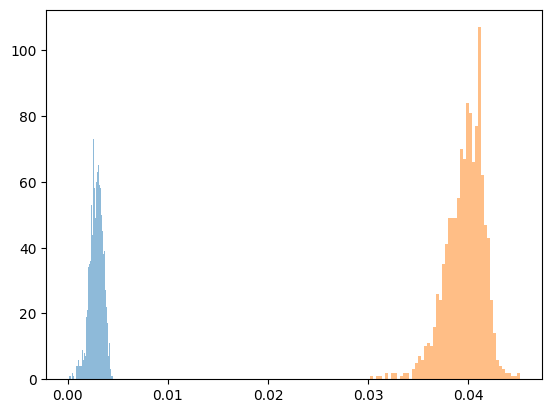

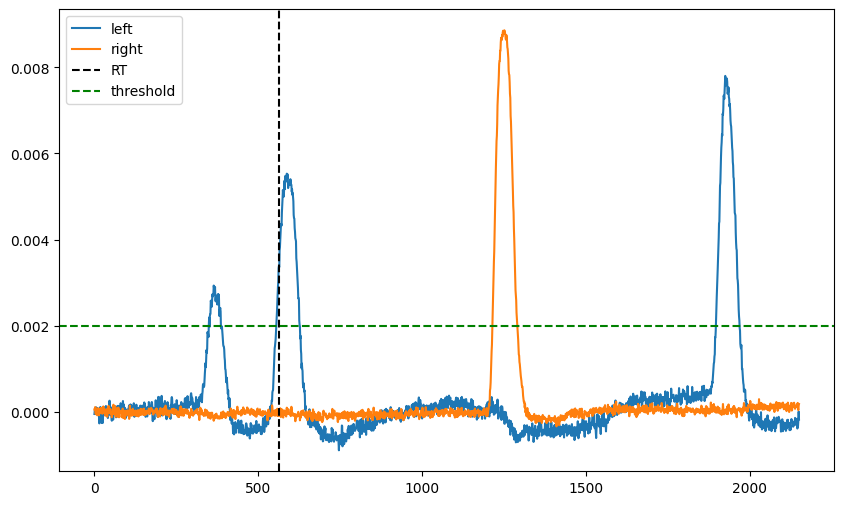

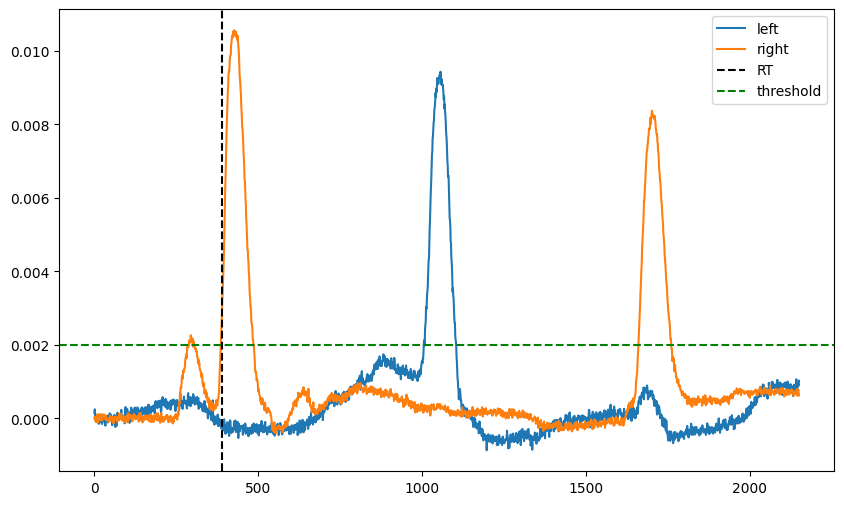

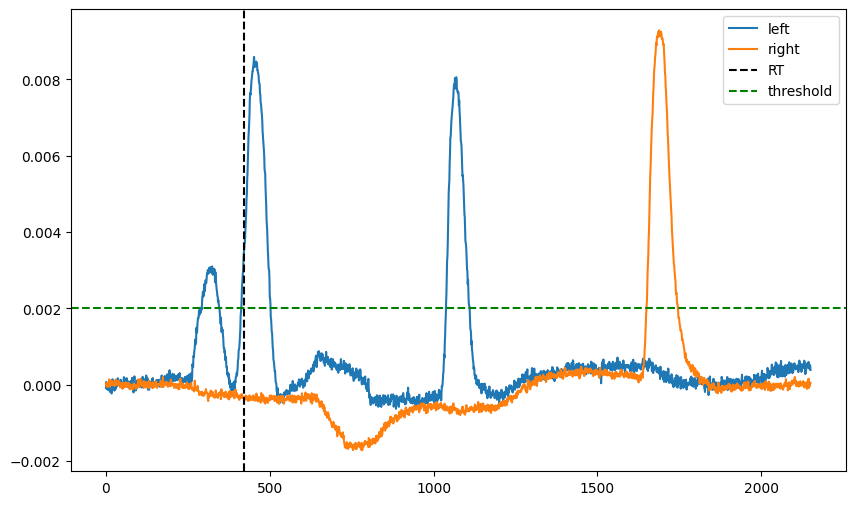

Dropped 38 epochs: 12, 23, 31, 32, 49, 60, 73, 95, 96, 107, 129, 167, 183, 222, 631, 669, 673, 700, 742, 781, 802, 831, 1221, 1276, 1327, 1340, 1344, 1371, 1381, 1393, 1397, 1450, 1460, 1472, 1859, 2067, 2096, 2099
13 trial rejected based on threshold of 0.0001
2323 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S1_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S10_epo.fif's epoched eeg


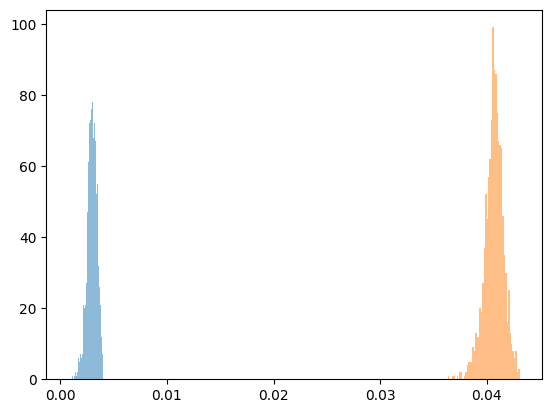

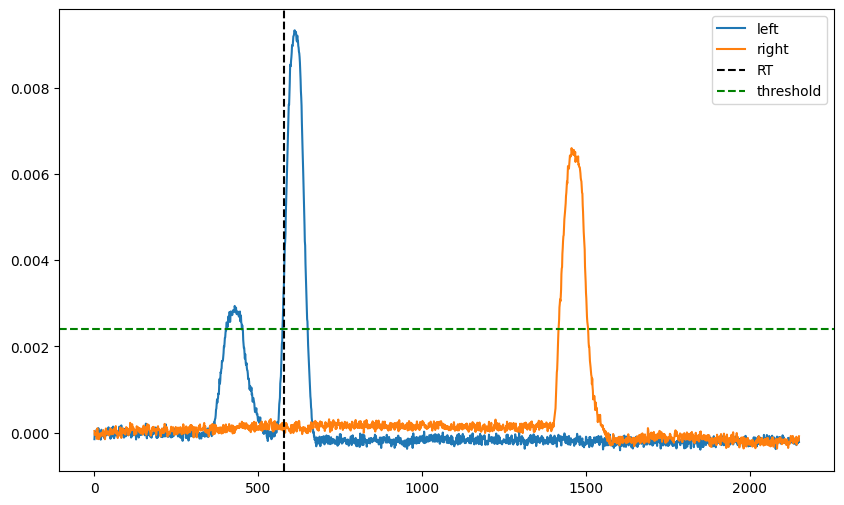

Dropped 17 epochs: 23, 76, 85, 266, 277, 328, 430, 463, 545, 607, 1078, 1114, 1517, 1575, 2300, 2379, 2437
80 trial rejected based on threshold of 0.0001
2350 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S10_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S11_epo.fif's epoched eeg


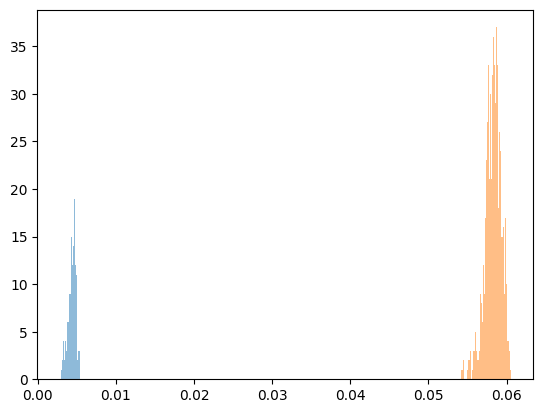

Dropped 9 epochs: 92, 216, 341, 702, 808, 889, 956, 994, 1014
132 trial rejected based on threshold of 0.0001
2303 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S11_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S12_epo.fif's epoched eeg


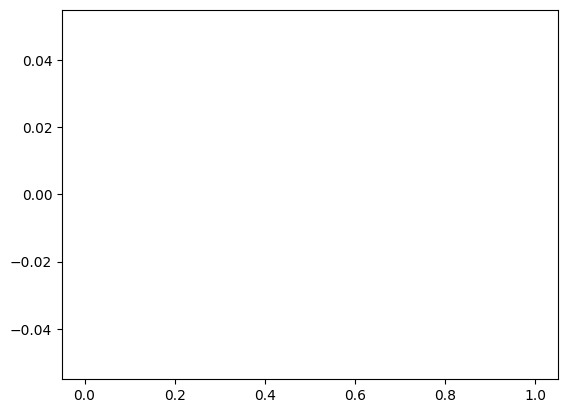

/opt/conda/lib/python3.11/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.11/site-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.11/site-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/opt/conda/lib/python3.11/site-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


6 trial rejected based on threshold of 0.0001
2442 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S12_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S13_epo.fif's epoched eeg


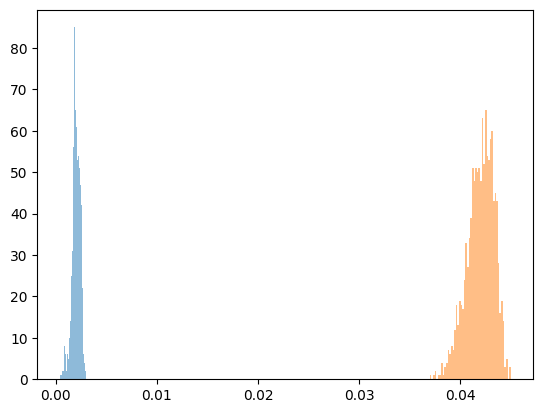

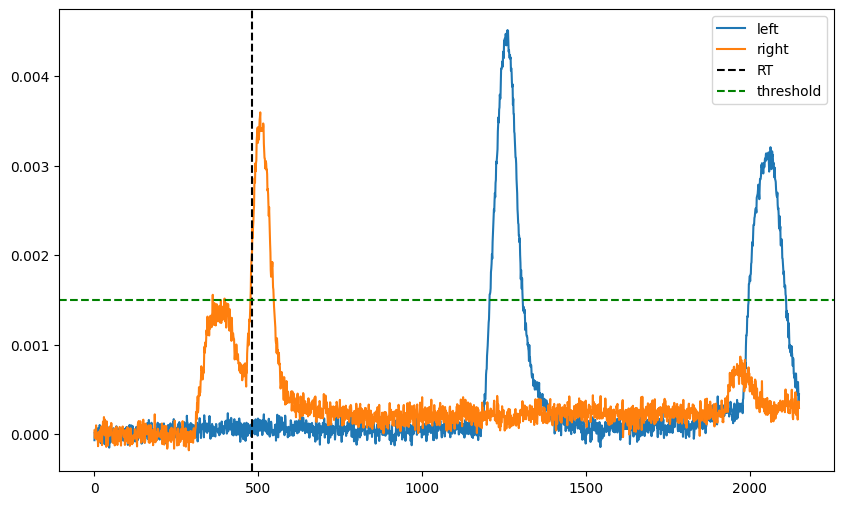

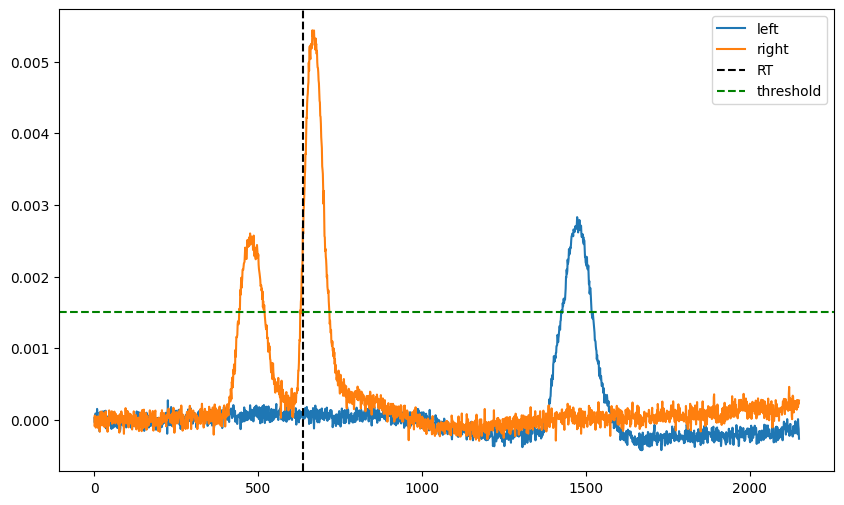

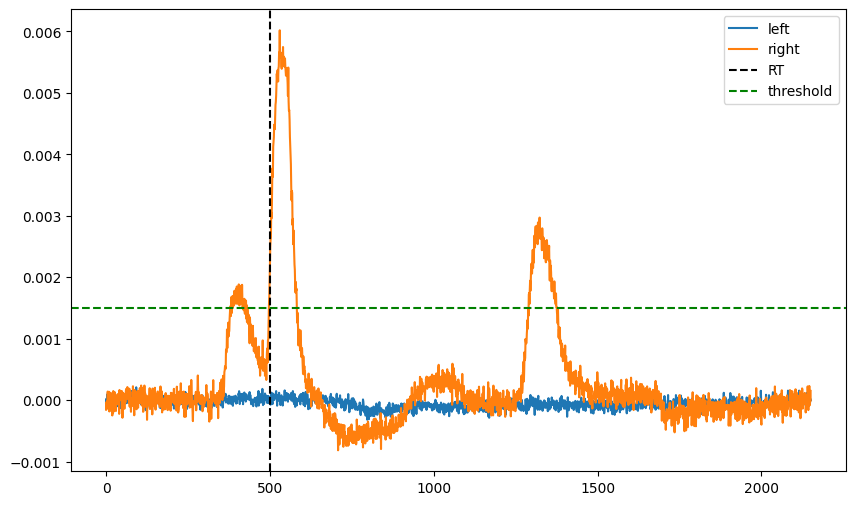

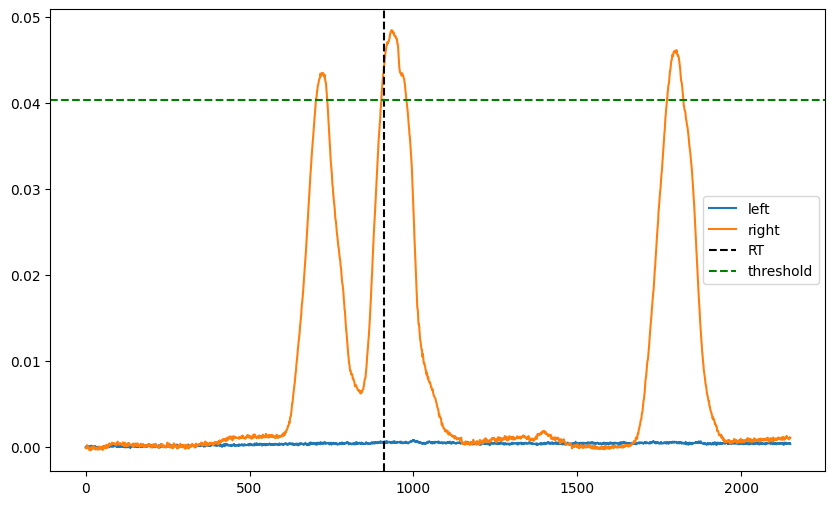

Dropped 53 epochs: 37, 126, 128, 129, 164, 191, 243, 254, 260, 303, 306, 357, 362, 363, 369, 379, 400, 423, 441, 465, 470, 530, 546, 554, 578, 710, 741, 787, 799, 811, 996, 1031, 1054, 1080, 1083, 1106, 1112, 1171, 1199, 1209, 1486, 1575, 1582, 1589, 1685, 1692, 1852, 2176, 2178, 2220, 2310, 2315, 2377
2 trial rejected based on threshold of 0.0001
2392 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S13_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S14_epo.fif's epoched eeg


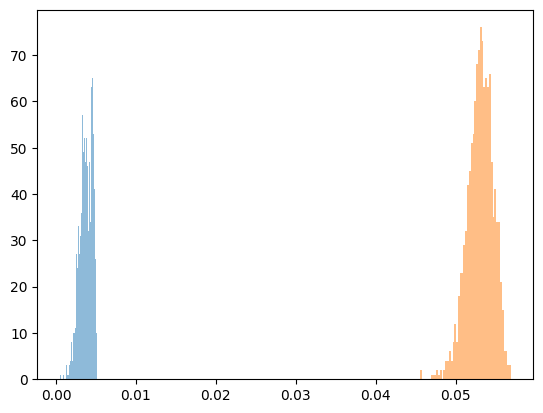

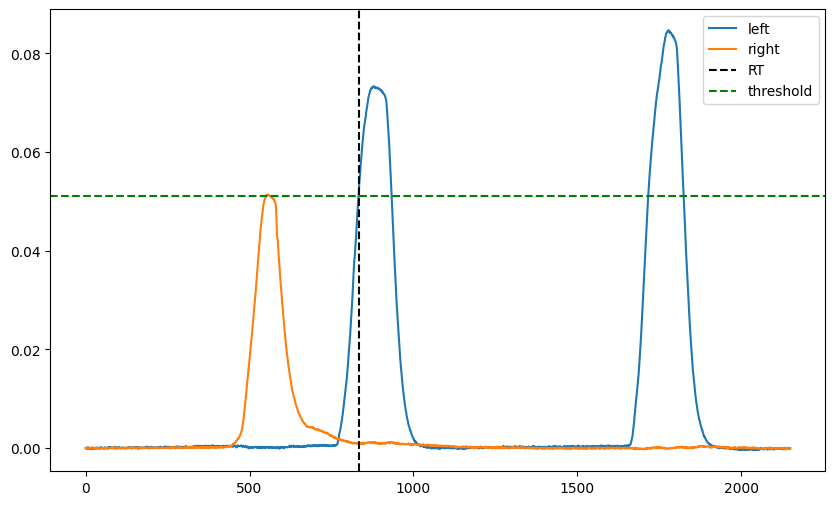

Dropped 24 epochs: 6, 43, 57, 107, 111, 117, 177, 197, 223, 317, 340, 402, 405, 439, 481, 508, 577, 939, 1188, 1211, 1487, 2014, 2020, 2130
47 trial rejected based on threshold of 0.0001
2377 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S14_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S15_epo.fif's epoched eeg


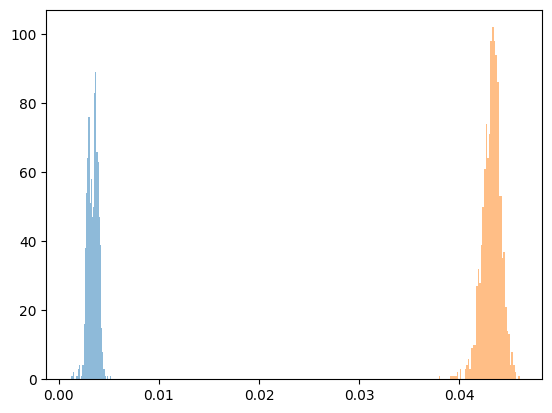

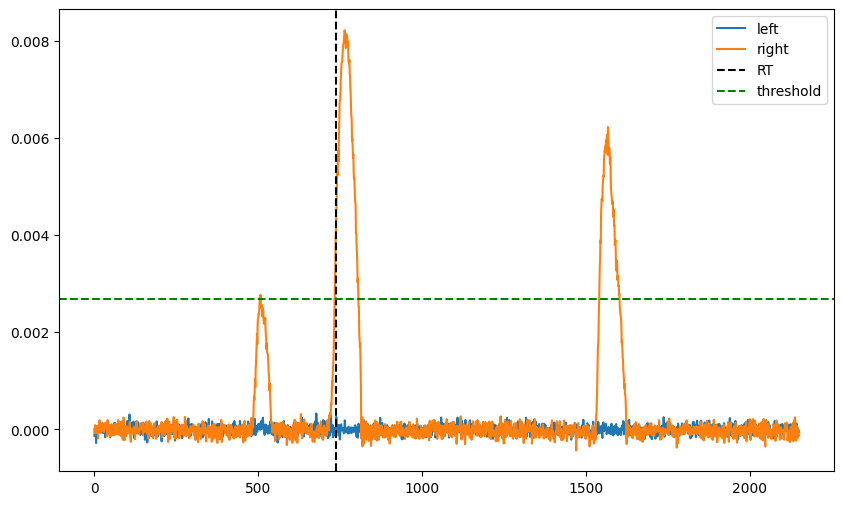

Dropped 19 epochs: 55, 126, 303, 495, 851, 1087, 1148, 1154, 1403, 1580, 1584, 1591, 1822, 1832, 2278, 2326, 2349, 2381, 2411
5 trial rejected based on threshold of 0.0001
2424 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S15_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S16_epo.fif's epoched eeg


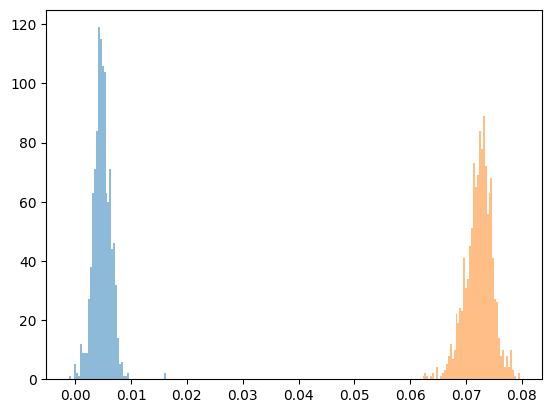

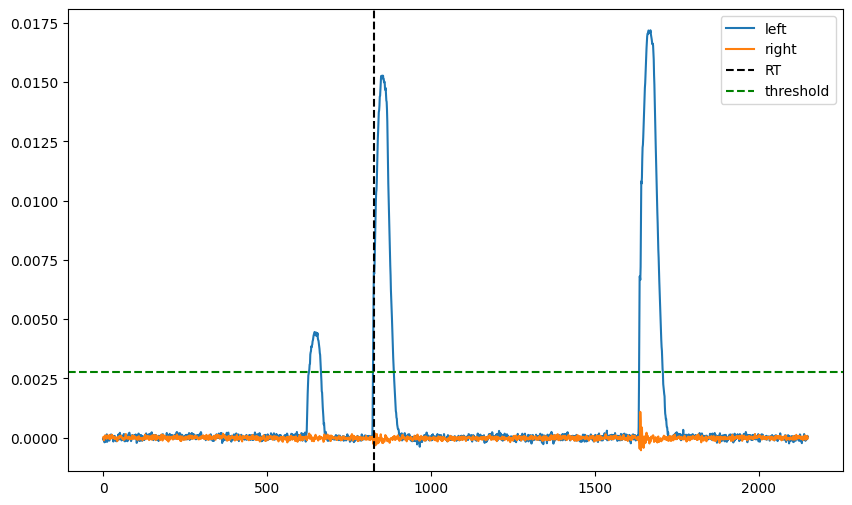

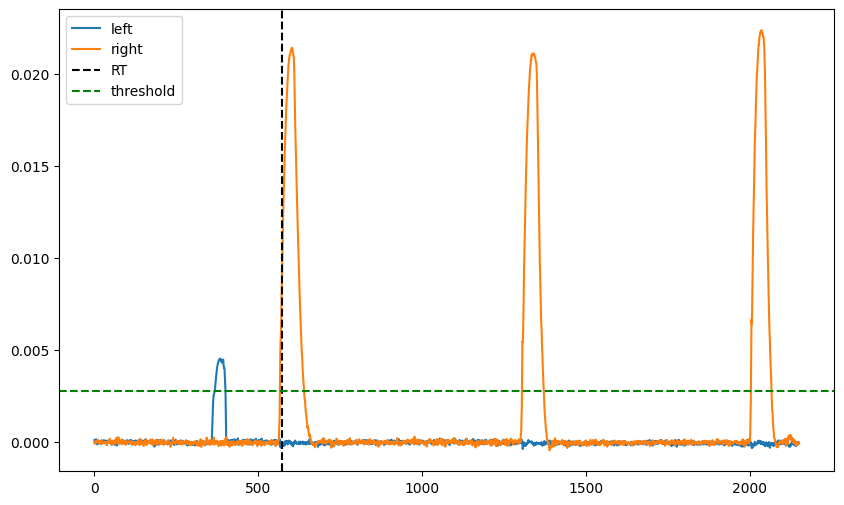

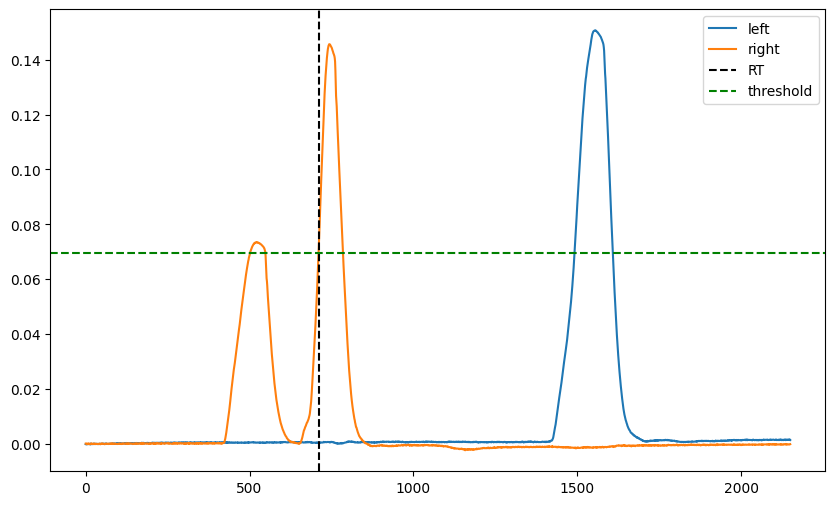

Dropped 30 epochs: 163, 199, 226, 440, 459, 488, 502, 504, 592, 593, 594, 791, 1050, 1090, 1268, 1369, 1391, 1419, 1529, 1587, 1688, 1735, 1736, 1966, 2092, 2135, 2160, 2169, 2186, 2300
25 trial rejected based on threshold of 0.0001
2292 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S16_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S17_epo.fif's epoched eeg


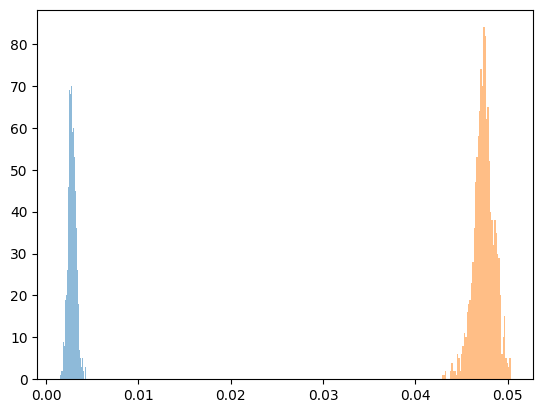

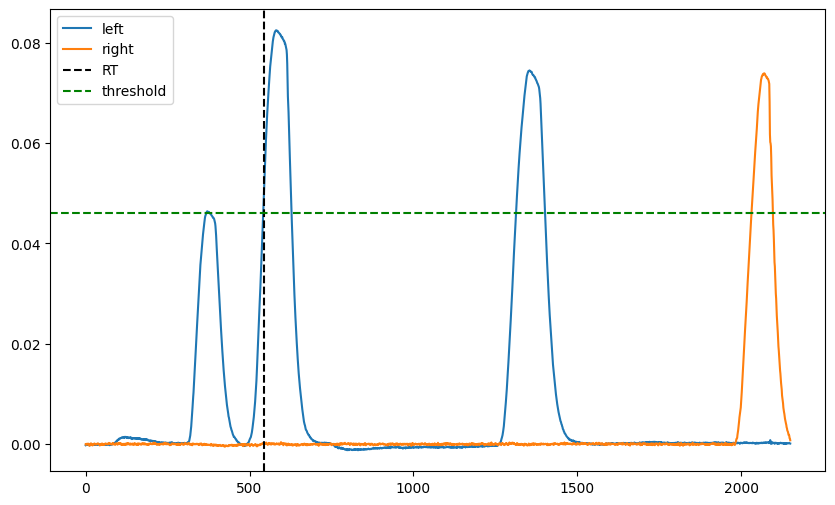

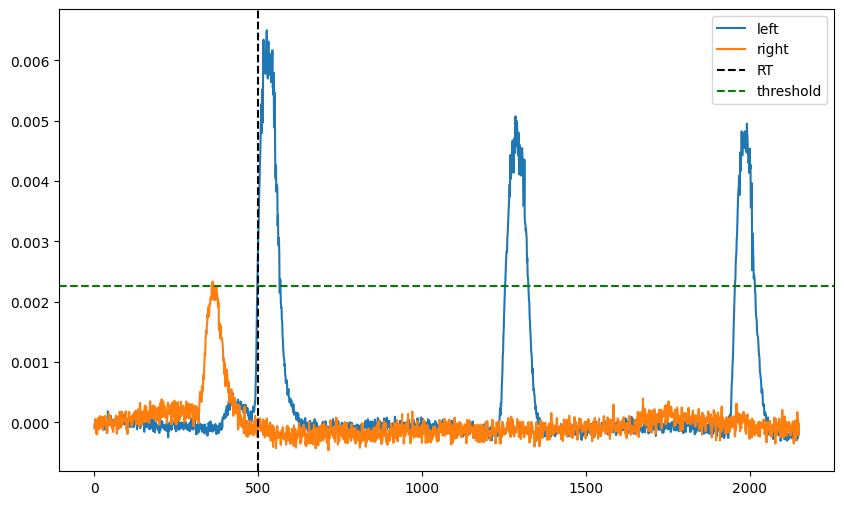

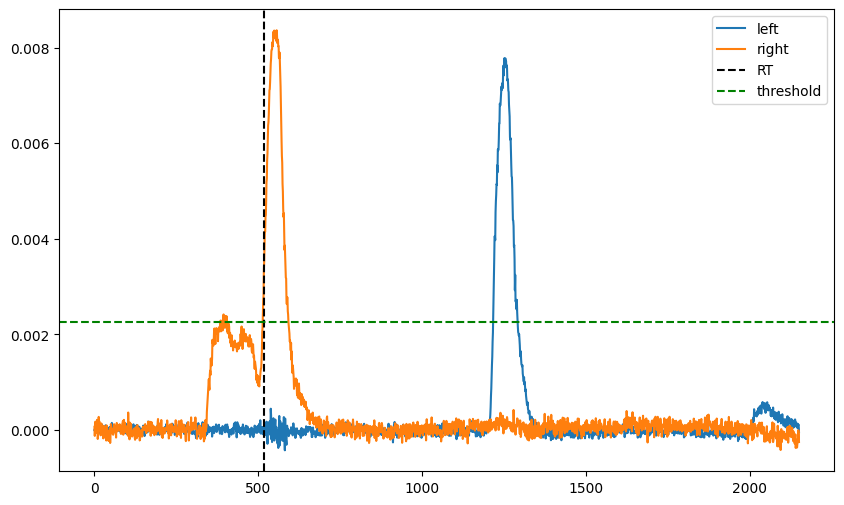

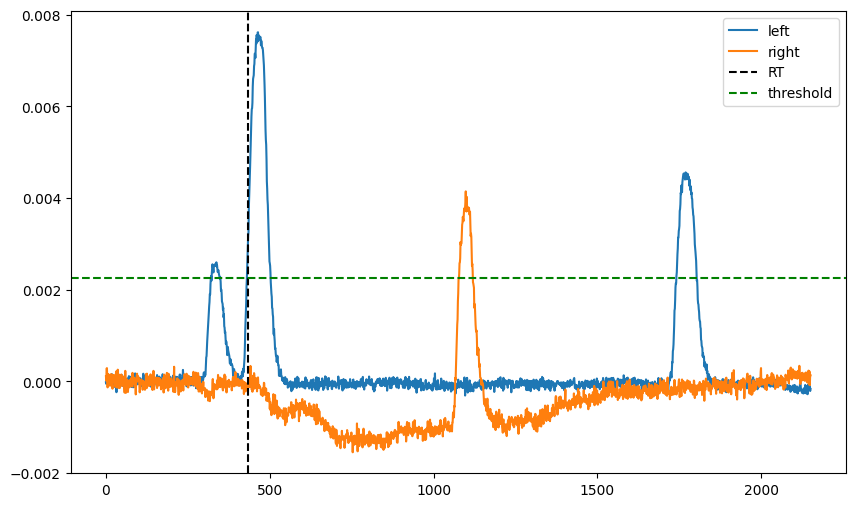

Dropped 42 epochs: 16, 94, 137, 175, 184, 208, 214, 231, 232, 242, 413, 721, 857, 1353, 1480, 1582, 1621, 1712, 1775, 1788, 1816, 1861, 1874, 1885, 1887, 1890, 1933, 1951, 1976, 1993, 1997, 2006, 2018, 2025, 2087, 2106, 2121, 2139, 2144, 2203, 2218, 2437
30 trial rejected based on threshold of 0.0001
2370 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S17_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S18_epo.fif's epoched eeg


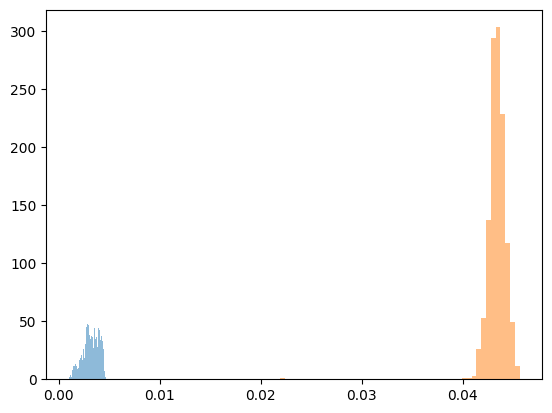

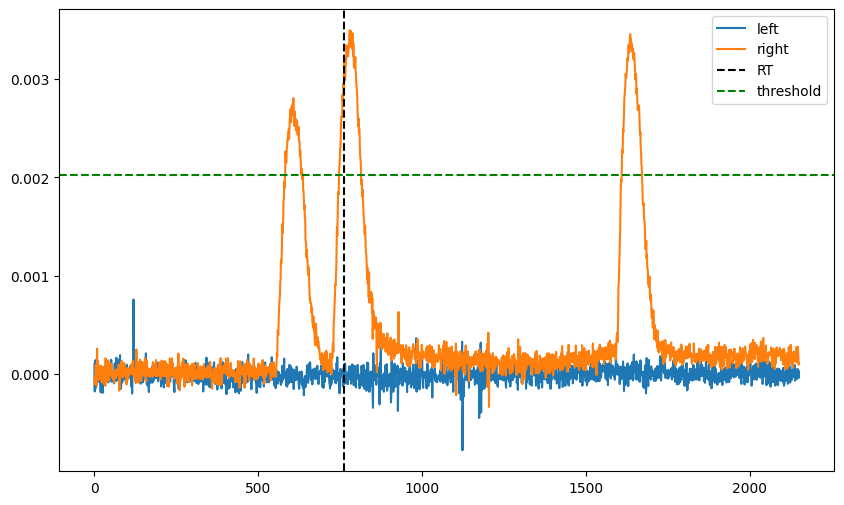

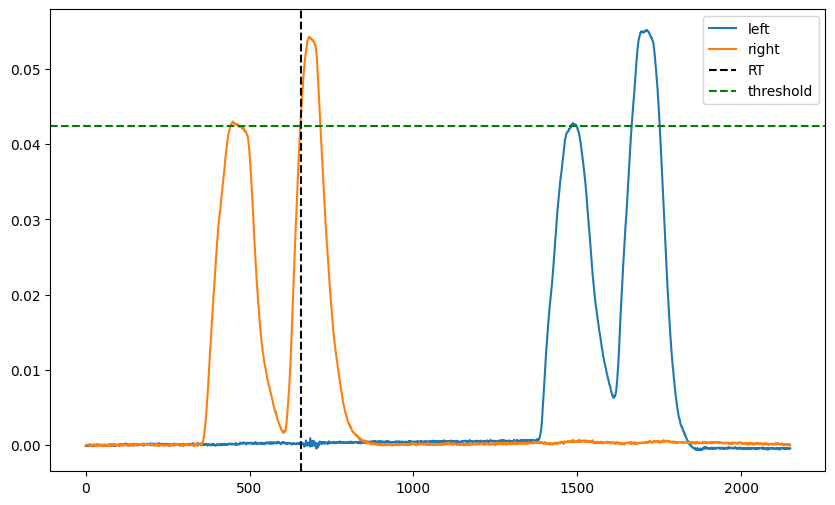

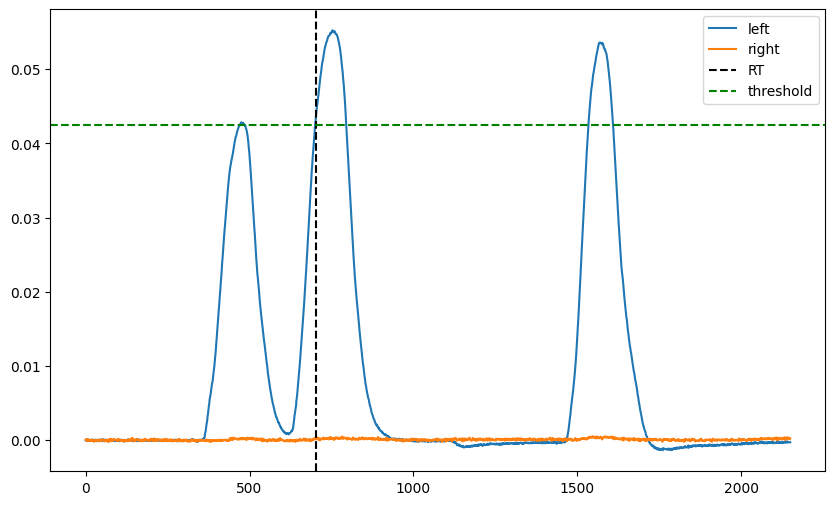

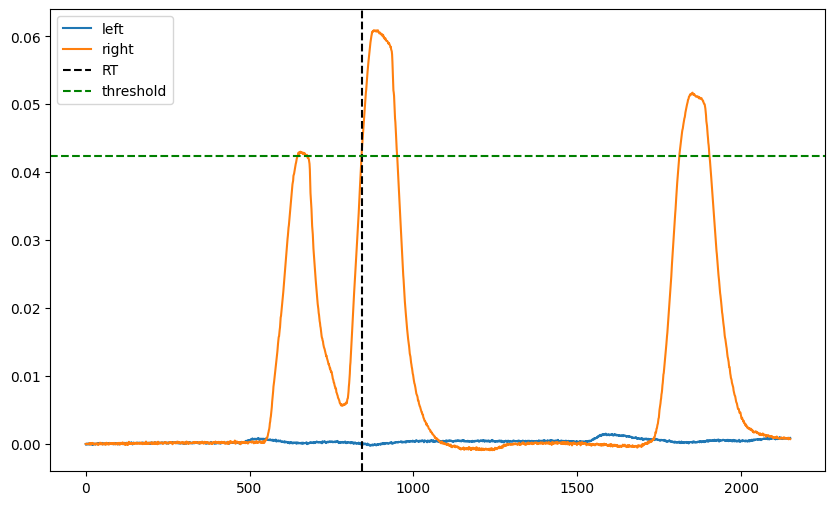

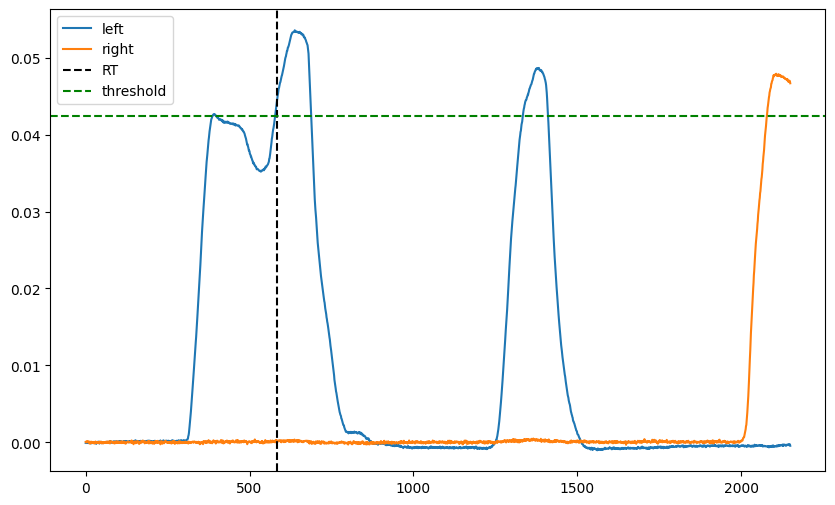

Dropped 100 epochs: 4, 14, 16, 22, 30, 32, 33, 37, 41, 51, 60, 61, 69, 80, 83, 84, 89, 95, 96, 104, 110, 112, 113, 115, 116, 119, 120, 123, 125, 138, 140, 148, 152, 171, 180, 188, 192, 206, 210, 211, 215, 219, 225, 230, 233, 238, 241, 245, 257, 265, 277, 282, 283, 289, 291, 302, 342, 508, 548, 572, 589, 725, 748, 749, 769, 786, 805, 836, 957, 962, 1111, 1141, 1159, 1253, 1351, 1436, 1496, 1558, 1564, 1622, 1627, 1642, 1794, 1856, 1893, 1956, 1973, 1996, 2036, 2059, 2063, 2217, 2245, 2253, 2262, 2272, 2350, 2409, 2435, 2445
10 trial rejected based on threshold of 0.0001
2338 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S18_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S2_epo.fif's epoched eeg


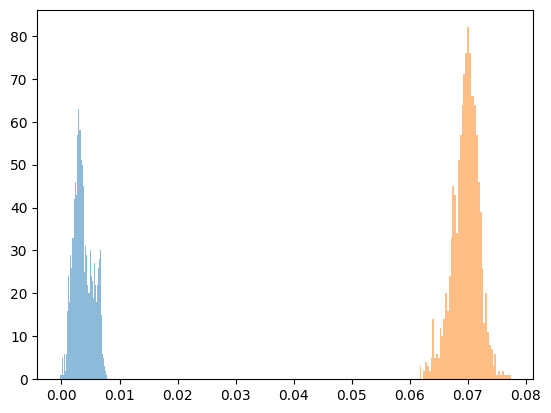

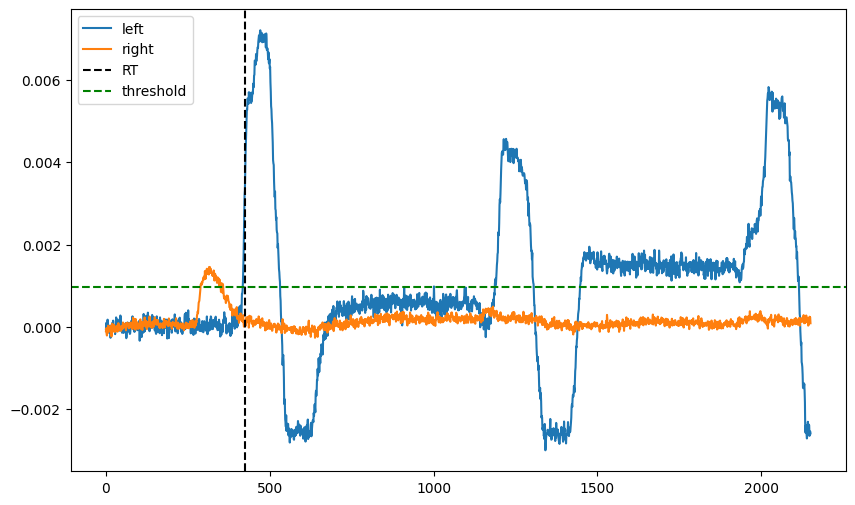

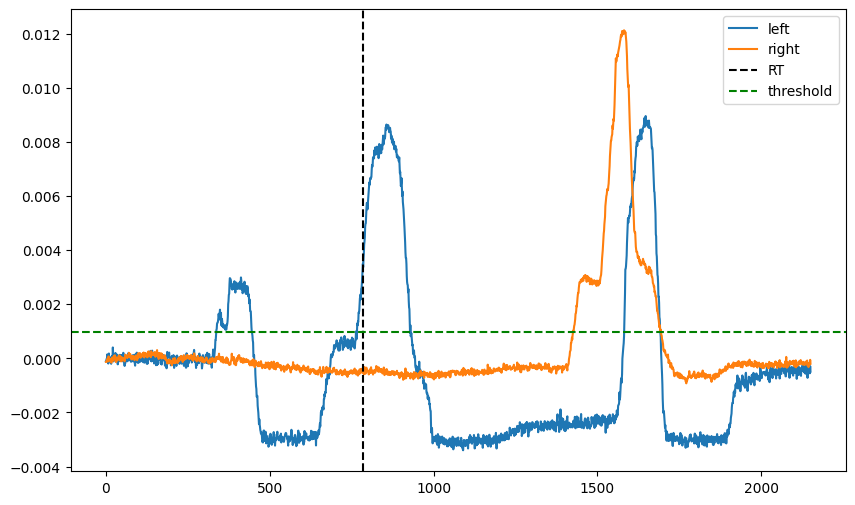

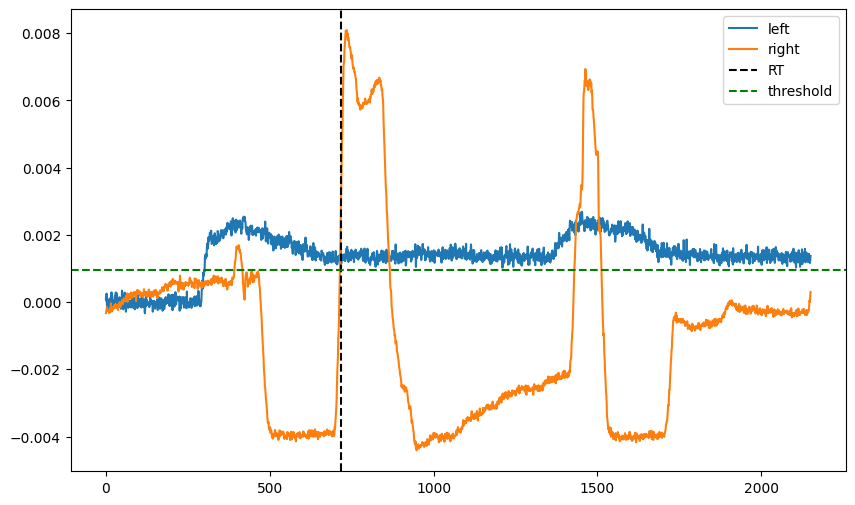

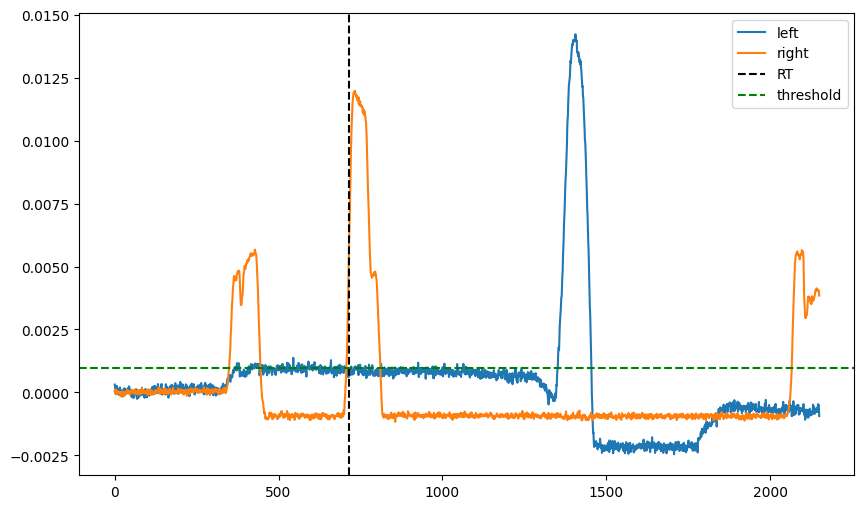

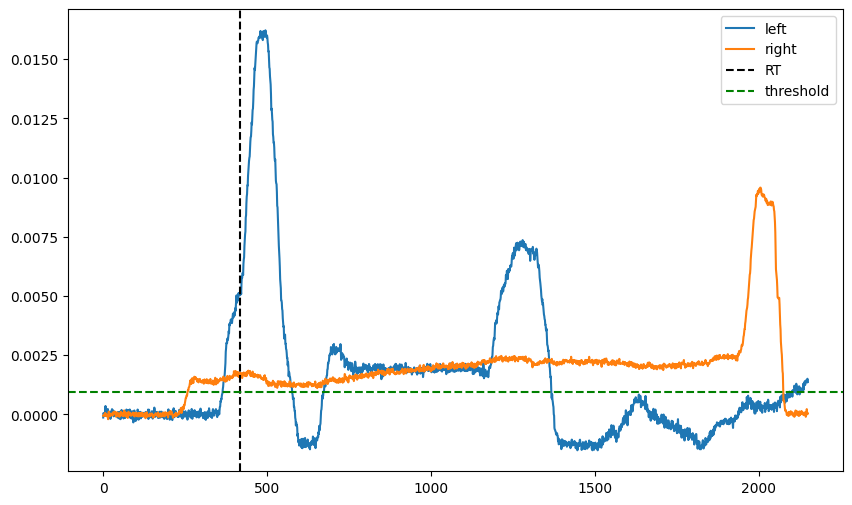

Dropped 118 epochs: 0, 15, 18, 23, 24, 37, 68, 104, 107, 118, 152, 153, 157, 158, 159, 160, 175, 176, 192, 203, 231, 232, 247, 249, 252, 257, 262, 264, 272, 274, 283, 290, 613, 620, 622, 636, 701, 715, 732, 742, 743, 753, 754, 764, 816, 819, 822, 825, 838, 853, 854, 858, 880, 888, 901, 1224, 1233, 1238, 1242, 1249, 1250, 1254, 1256, 1281, 1282, 1283, 1290, 1303, 1311, 1313, 1314, 1318, 1320, 1322, 1324, 1328, 1332, 1387, 1428, 1437, 1483, 1484, 1493, 1497, 1503, 1624, 1836, 1848, 1853, 1857, 1878, 1880, 1914, 1952, 1956, 1959, 1965, 1975, 1987, 1994, 2001, 2004, 2005, 2009, 2020, 2028, 2031, 2033, 2055, 2069, 2071, 2140, 2171, 2174, 2192, 2196, 2386, 2439
658 trial rejected based on threshold of 0.0001
1666 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S2_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S20_epo.fif's epoched eeg


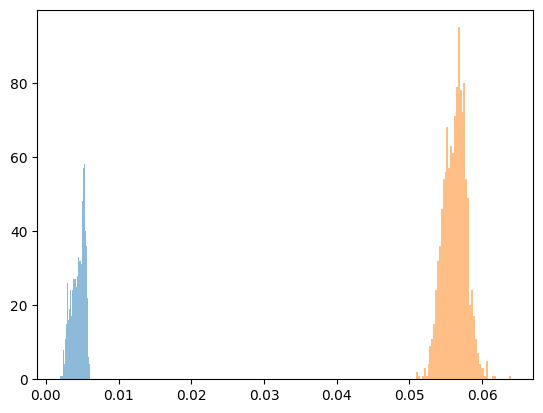

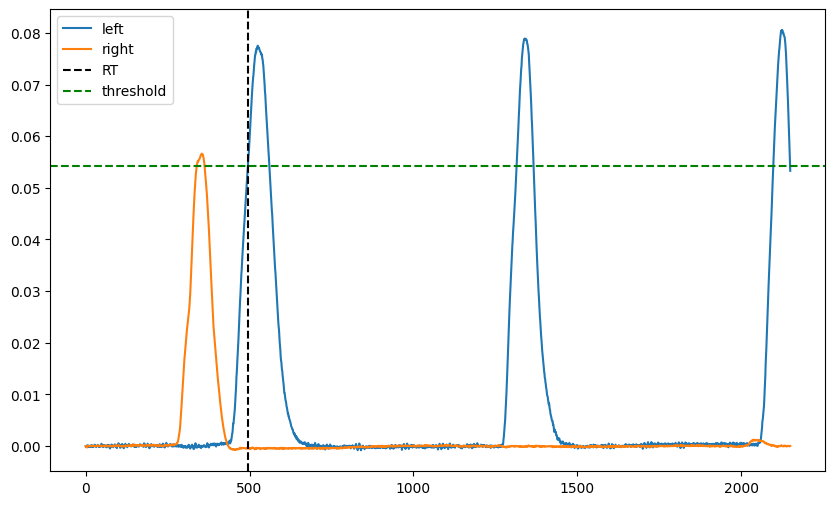

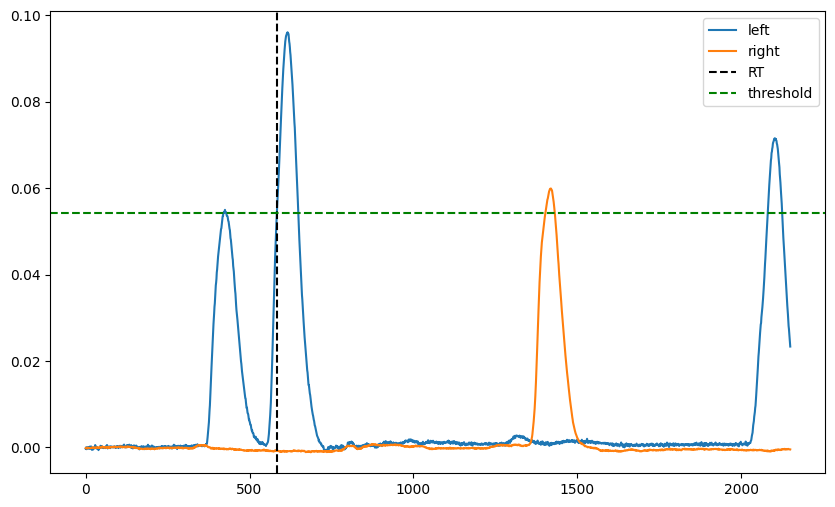

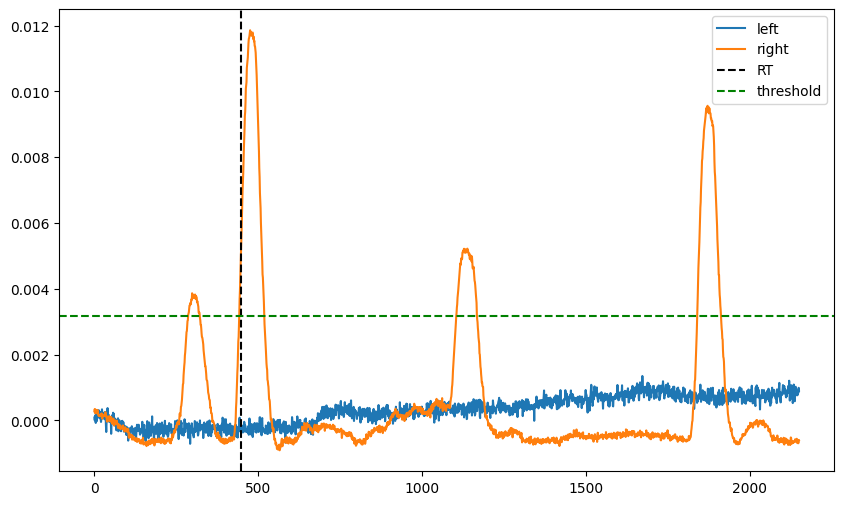

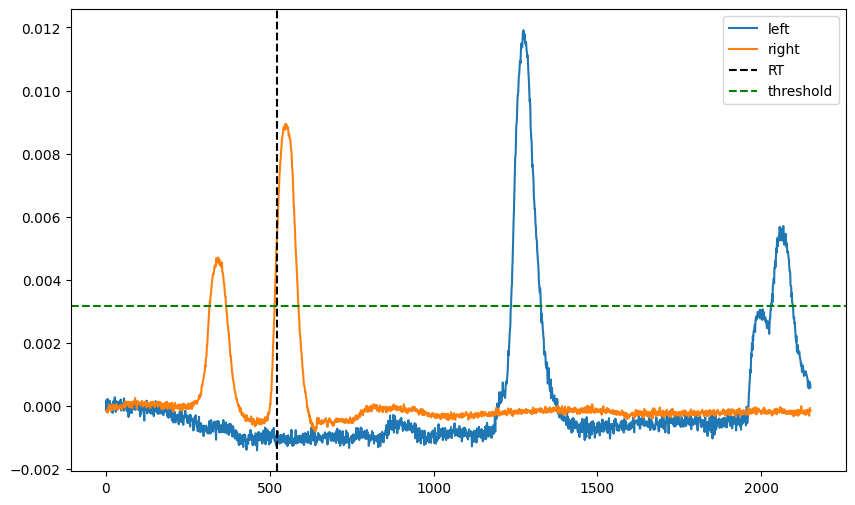

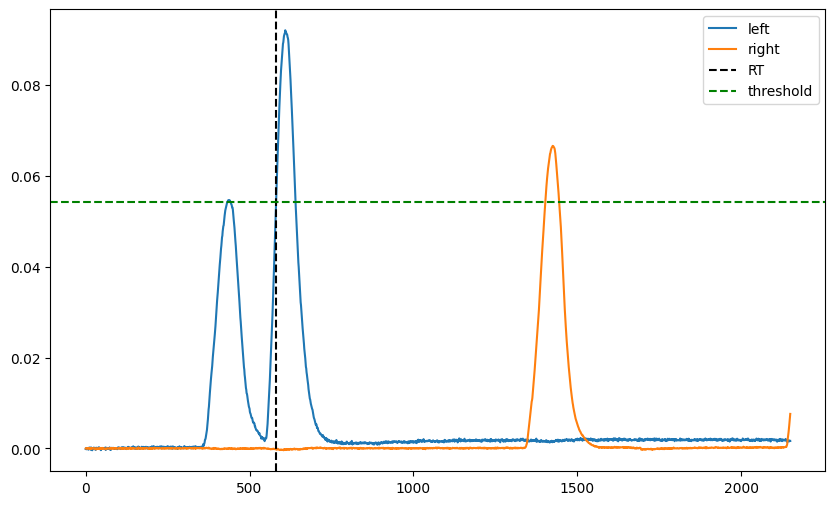

Dropped 73 epochs: 160, 174, 206, 289, 394, 530, 585, 630, 669, 725, 736, 754, 764, 779, 787, 808, 894, 945, 963, 986, 1034, 1039, 1046, 1105, 1109, 1114, 1142, 1158, 1181, 1238, 1256, 1307, 1401, 1430, 1440, 1446, 1452, 1480, 1500, 1504, 1561, 1572, 1586, 1597, 1698, 1752, 1790, 1809, 1829, 1861, 1870, 1884, 1904, 1919, 1929, 1998, 2000, 2007, 2101, 2139, 2144, 2155, 2189, 2235, 2257, 2285, 2302, 2317, 2371, 2374, 2381, 2412, 2425
37 trial rejected based on threshold of 0.0001
2331 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S20_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S3_epo.fif's epoched eeg


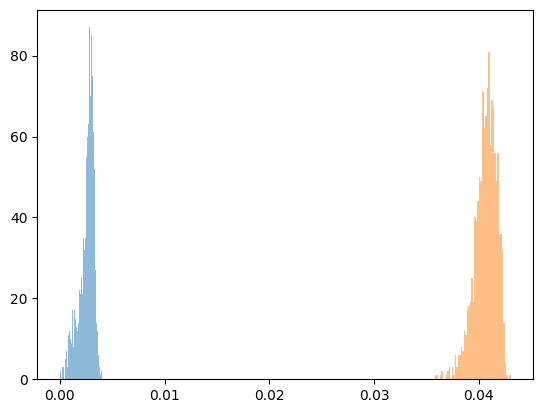

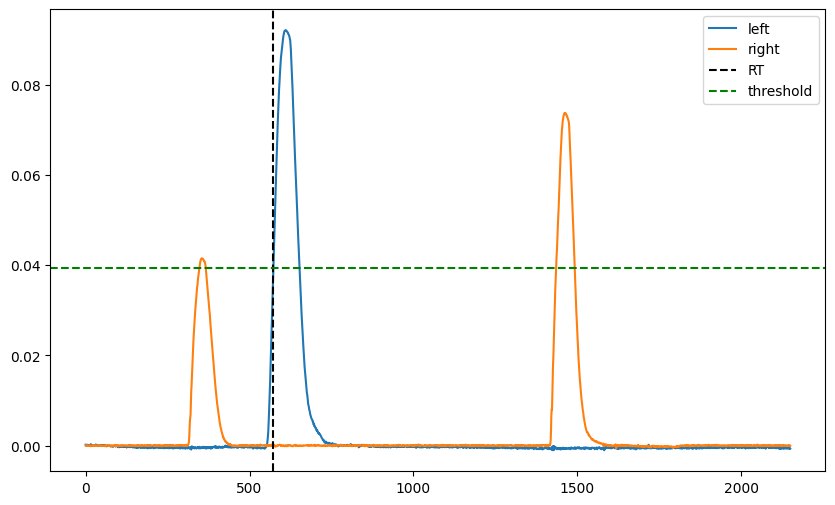

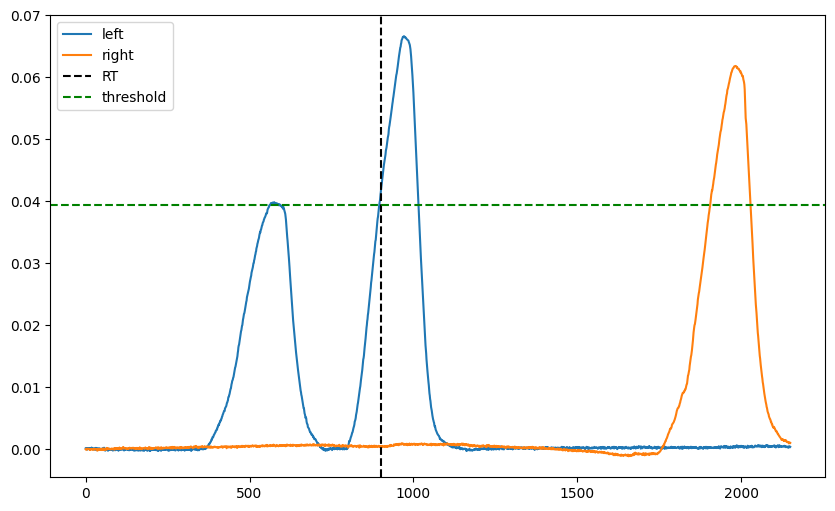

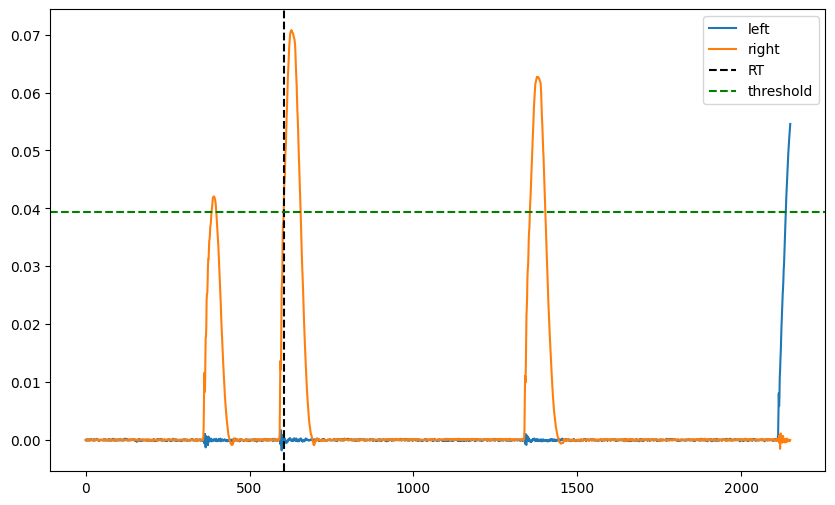

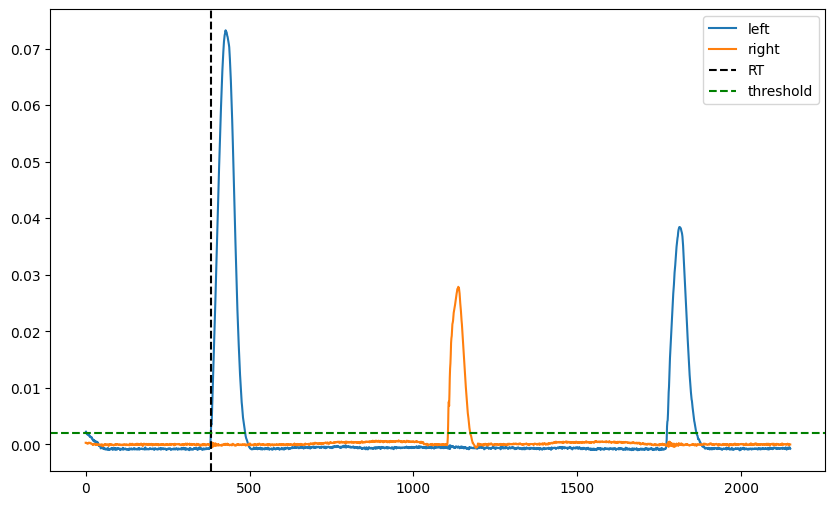

Dropped 18 epochs: 49, 54, 785, 834, 852, 862, 1253, 1377, 1391, 1525, 1994, 2011, 2028, 2035, 2050, 2070, 2083, 2134
11 trial rejected based on threshold of 0.0001
2411 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S3_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S4_epo.fif's epoched eeg


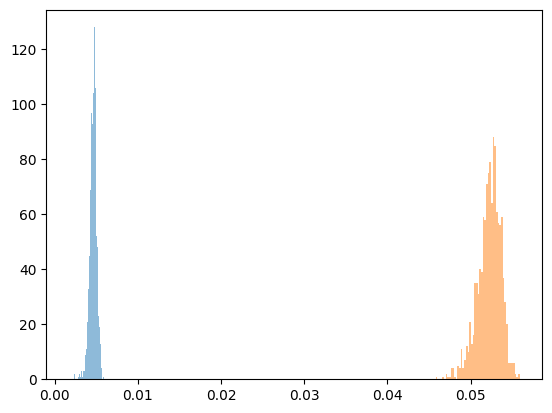

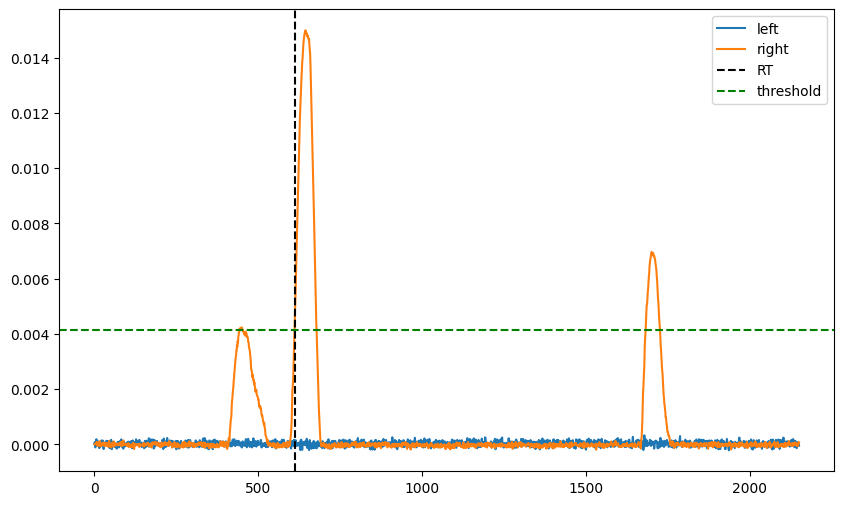

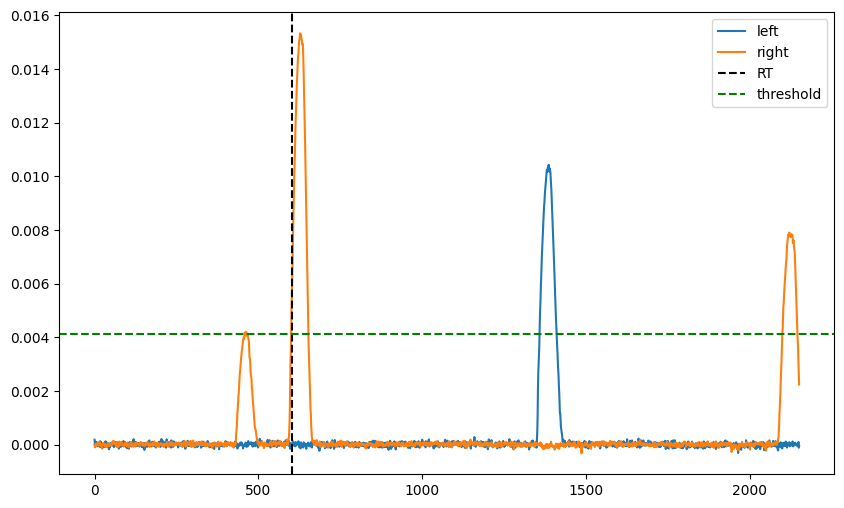

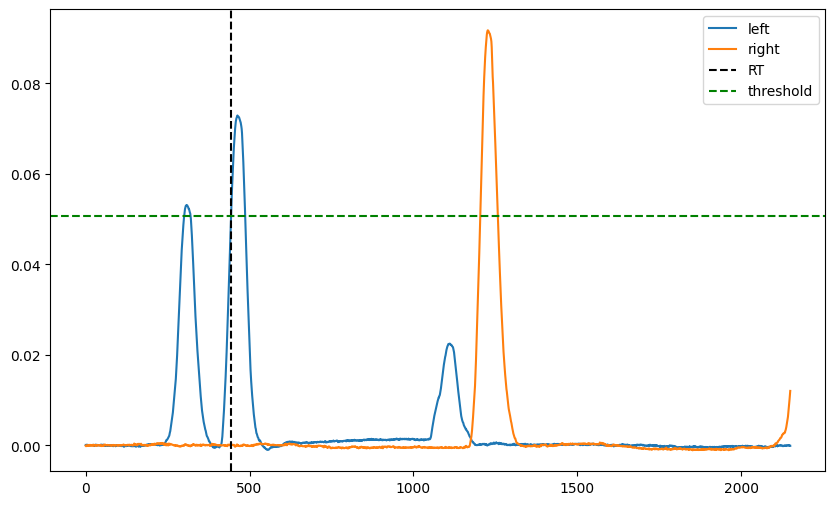

Dropped 56 epochs: 78, 150, 161, 184, 342, 361, 436, 443, 451, 466, 527, 599, 607, 615, 712, 753, 809, 887, 934, 976, 1101, 1135, 1203, 1219, 1228, 1252, 1270, 1319, 1323, 1335, 1353, 1395, 1406, 1419, 1442, 1469, 1480, 1506, 1551, 1597, 1606, 1641, 1651, 1705, 1767, 1838, 1922, 1968, 2009, 2034, 2055, 2062, 2073, 2084, 2200, 2311
429 trial rejected based on threshold of 0.0001
1963 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S4_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S5_epo.fif's epoched eeg


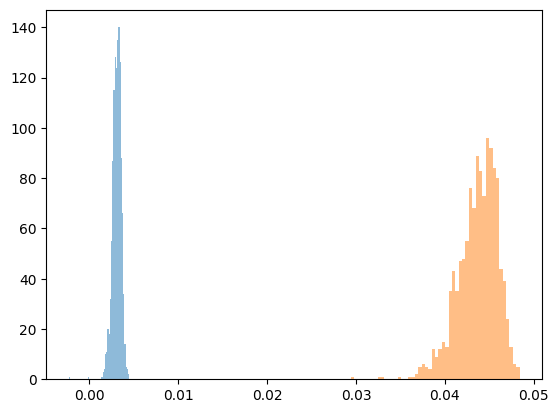

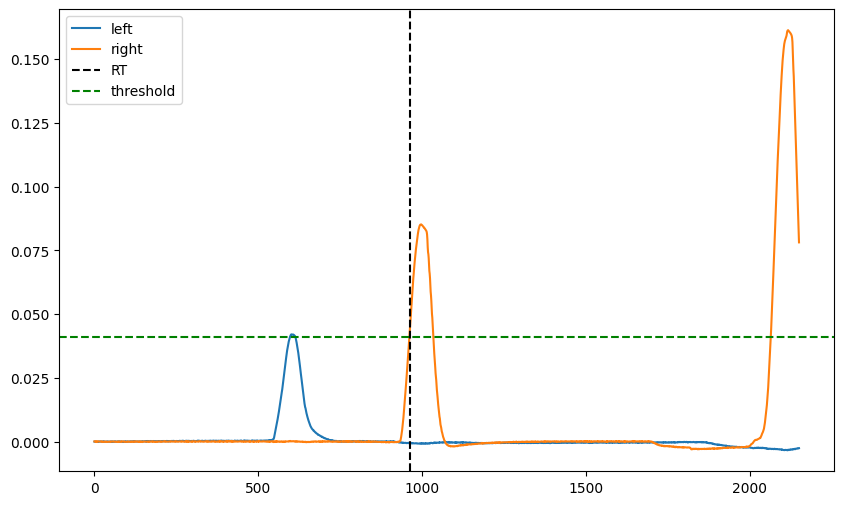

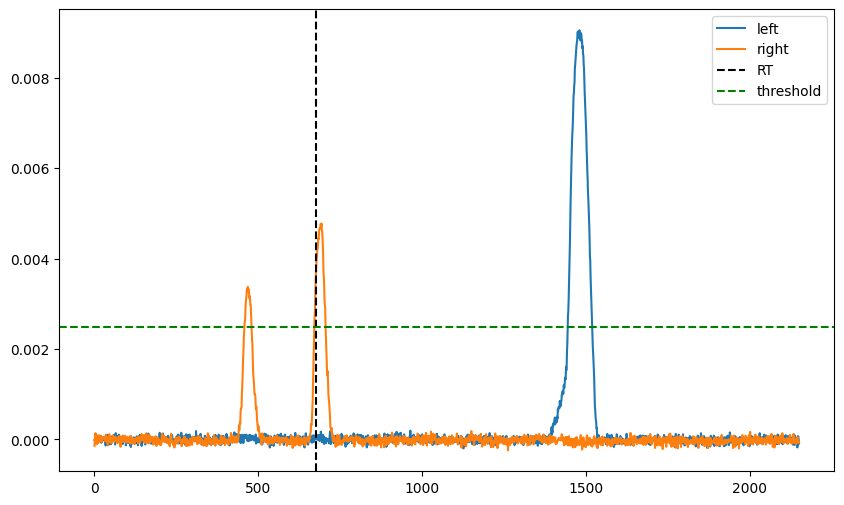

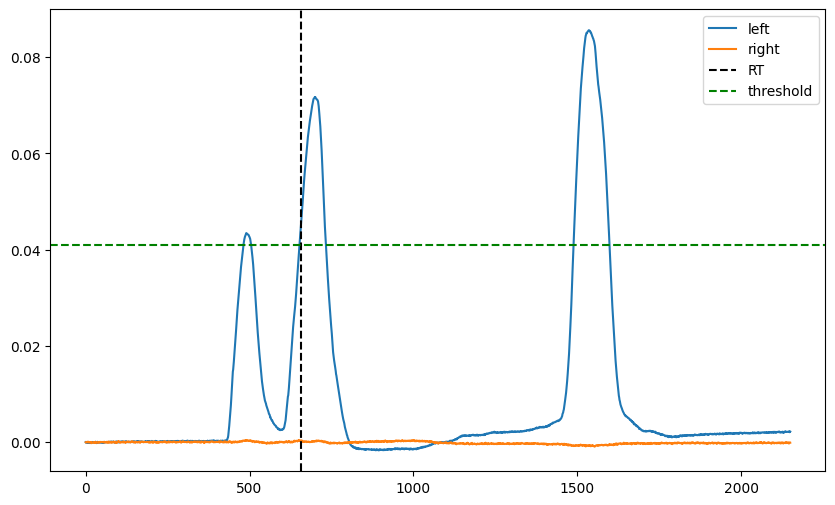

Dropped 34 epochs: 94, 122, 128, 132, 138, 139, 153, 159, 169, 174, 184, 285, 329, 431, 559, 575, 595, 665, 918, 1376, 1550, 1555, 1628, 1687, 1846, 1913, 1958, 2106, 2143, 2313, 2355, 2369, 2423, 2442
9 trial rejected based on threshold of 0.0001
2404 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S5_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S6_epo.fif's epoched eeg


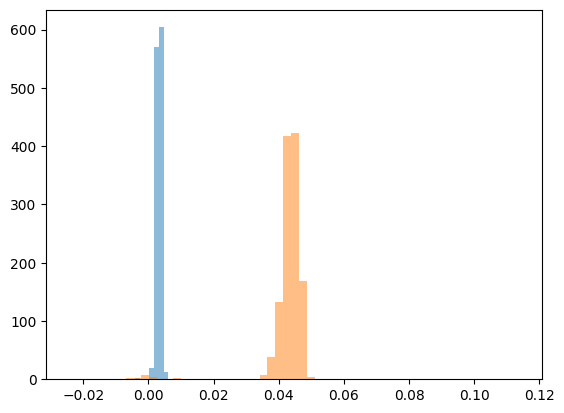

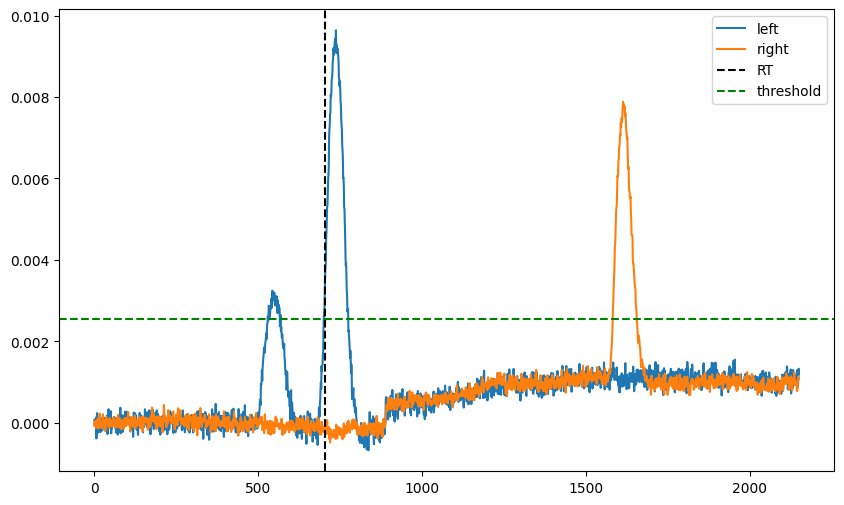

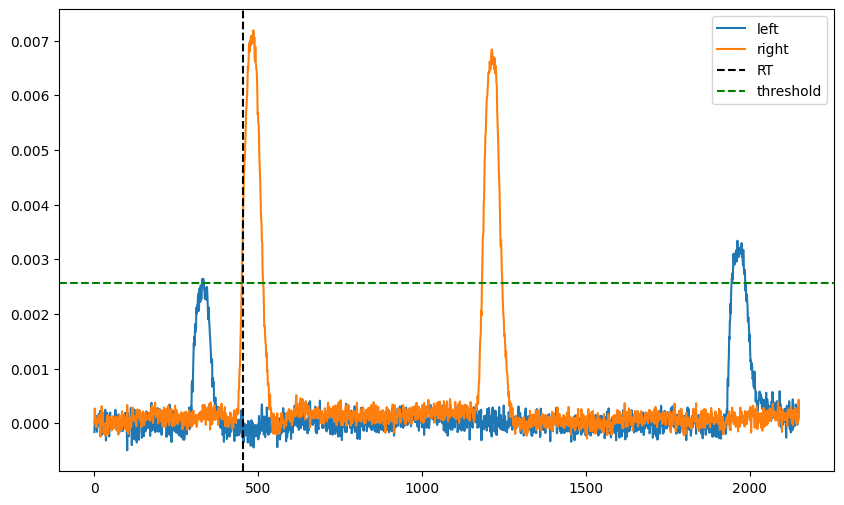

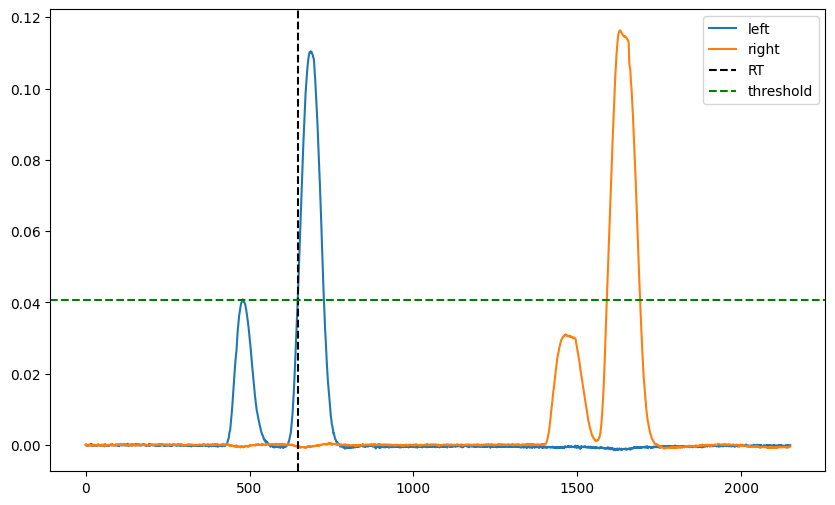

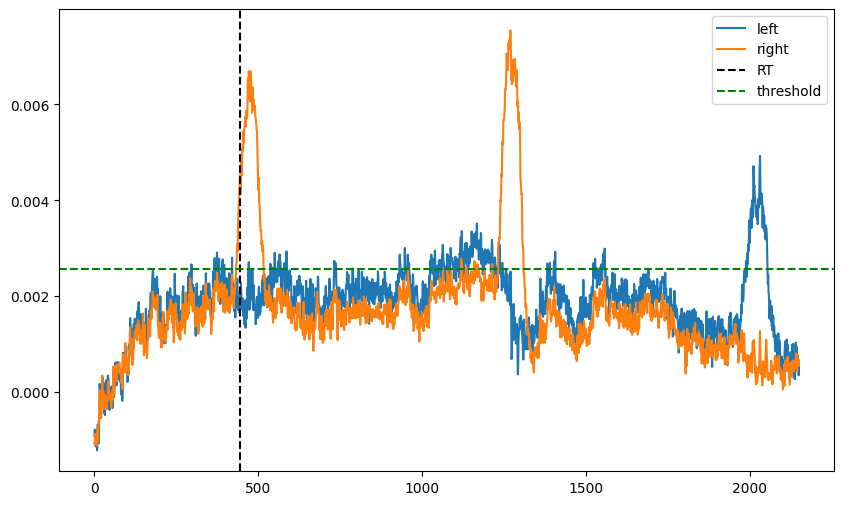

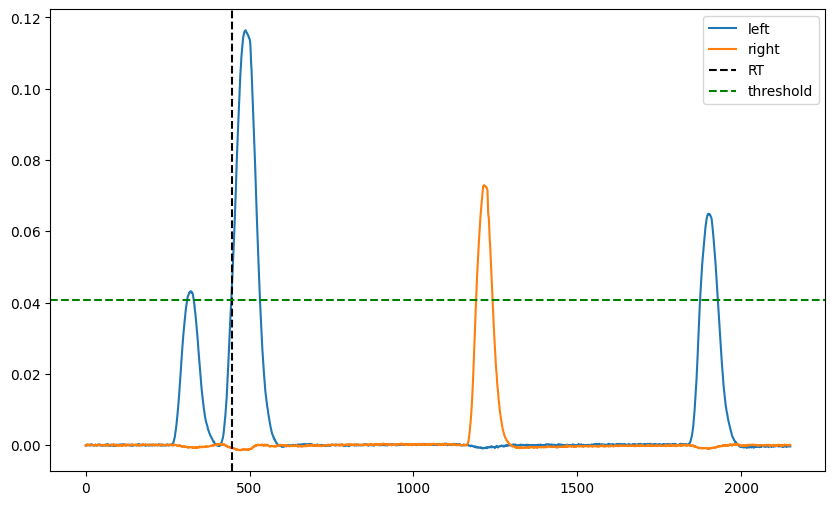

Dropped 67 epochs: 22, 53, 75, 84, 100, 141, 198, 216, 233, 249, 269, 296, 335, 386, 404, 436, 439, 477, 634, 654, 669, 670, 671, 680, 683, 684, 685, 689, 690, 692, 703, 724, 956, 1018, 1048, 1067, 1096, 1100, 1106, 1137, 1196, 1245, 1322, 1414, 1462, 1471, 1482, 1521, 1538, 1574, 1601, 1660, 1689, 1718, 1758, 1879, 1976, 2026, 2061, 2274, 2281, 2319, 2344, 2355, 2367, 2390, 2419
55 trial rejected based on threshold of 0.0001
2325 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S6_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S7_epo.fif's epoched eeg


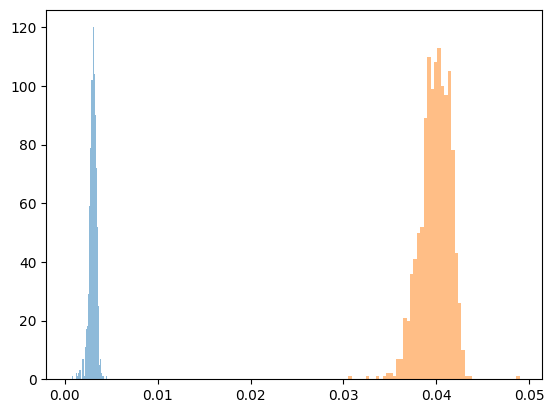

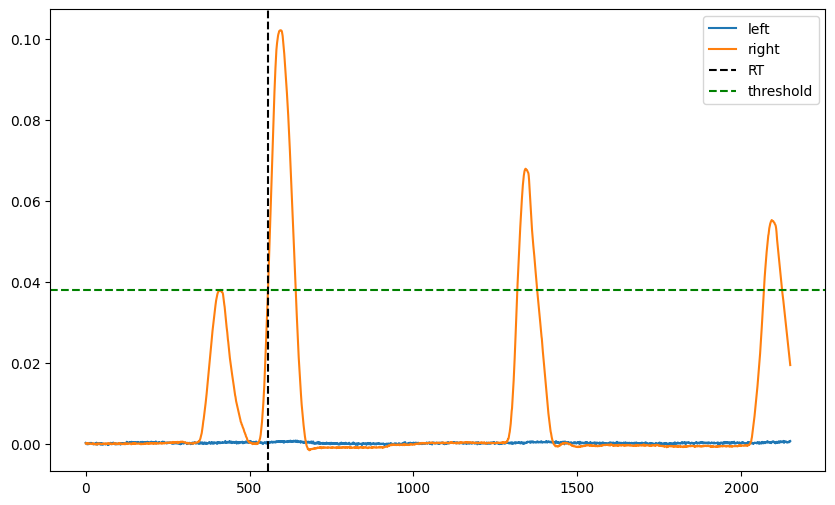

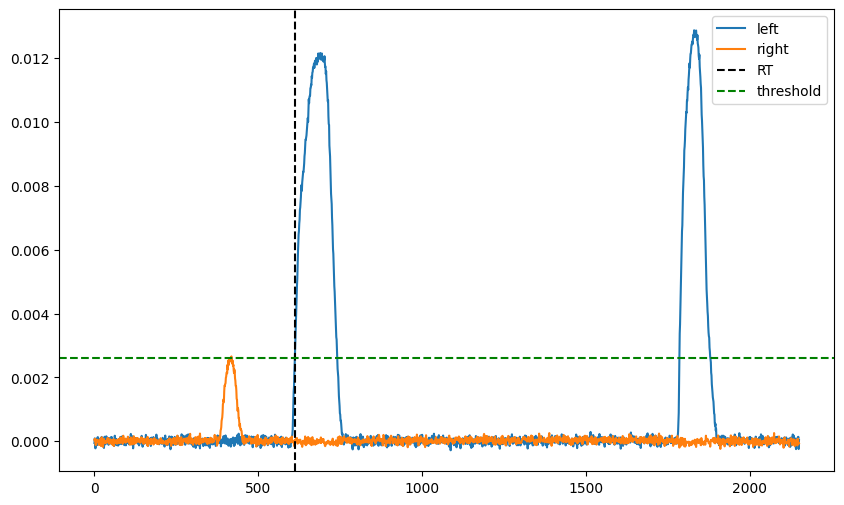

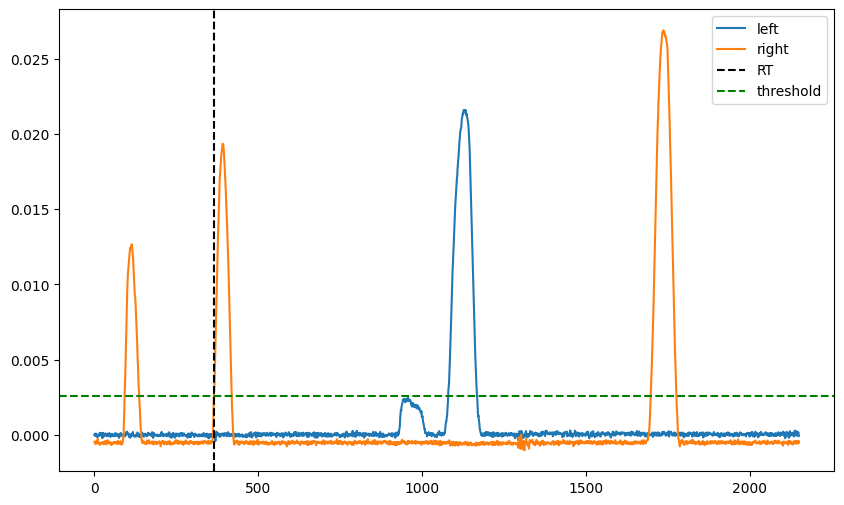

Dropped 55 epochs: 20, 32, 70, 78, 265, 288, 294, 347, 384, 429, 461, 549, 558, 591, 593, 610, 642, 751, 798, 810, 870, 1094, 1260, 1261, 1275, 1284, 1293, 1298, 1304, 1319, 1321, 1327, 1365, 1395, 1575, 1648, 1655, 1684, 1698, 1703, 1704, 1717, 1745, 1758, 1782, 1785, 1825, 1854, 1880, 1986, 1994, 2028, 2076, 2081, 2133
84 trial rejected based on threshold of 0.0001
2267 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S7_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S8_epo.fif's epoched eeg


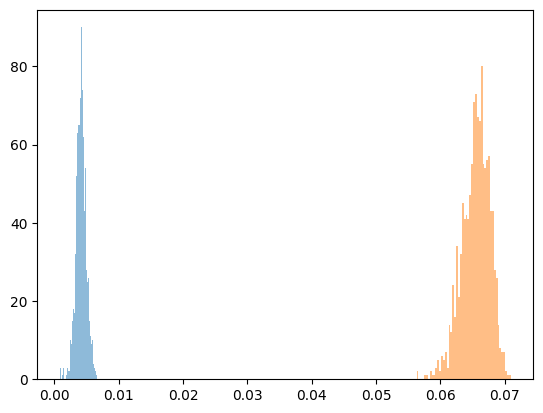

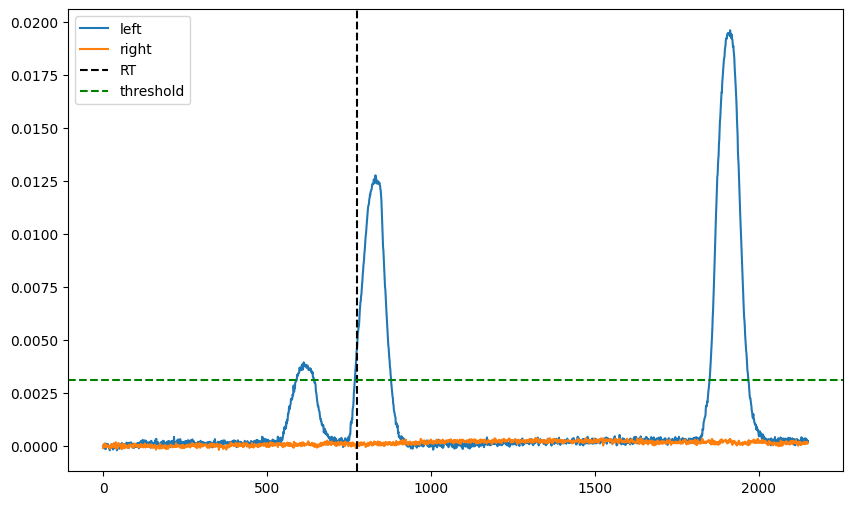

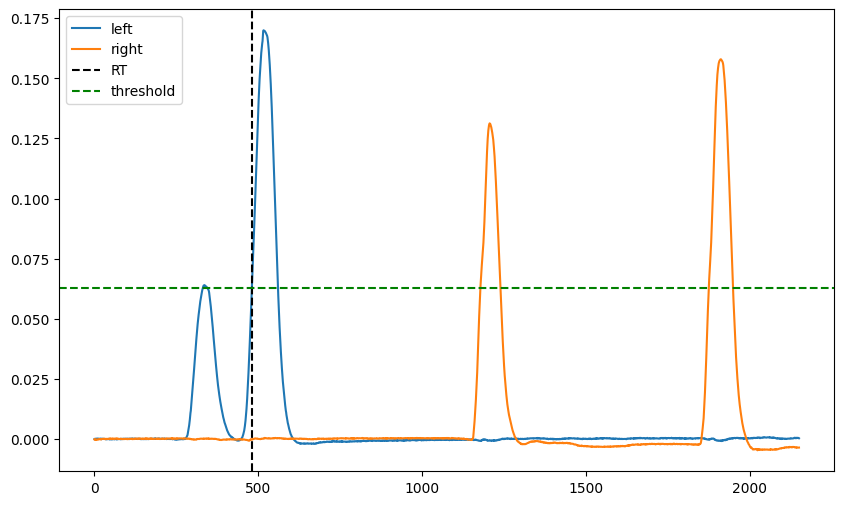

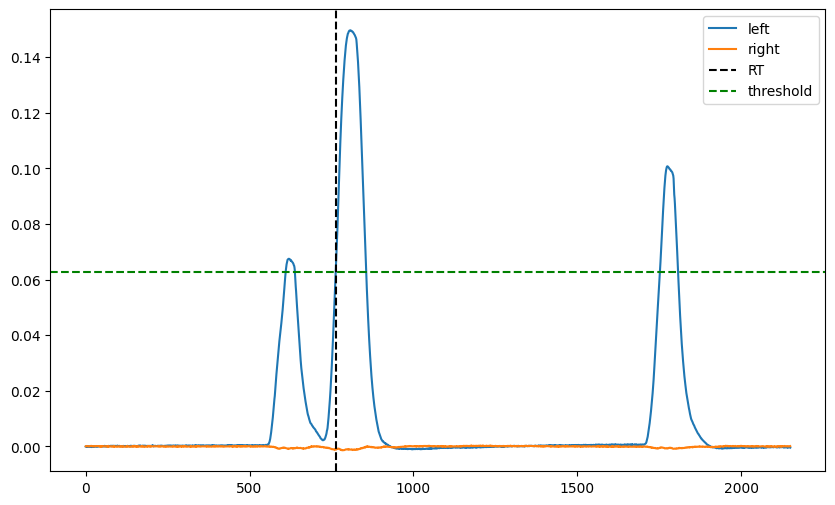

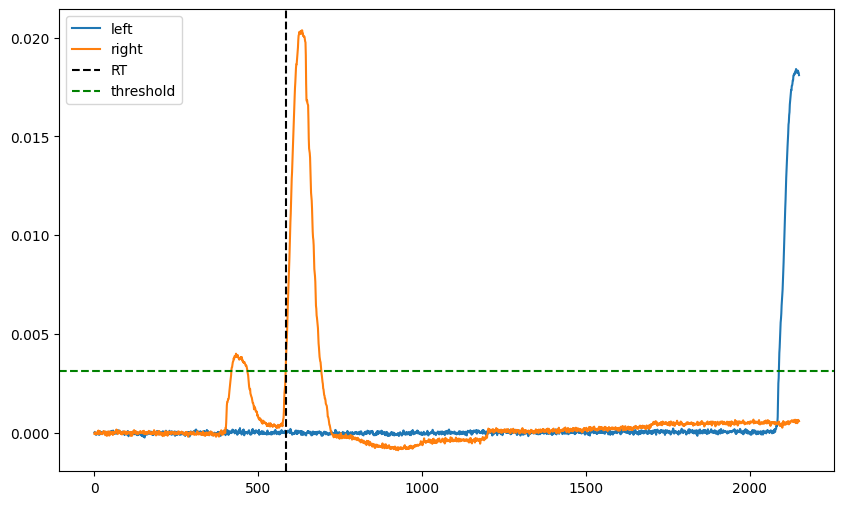

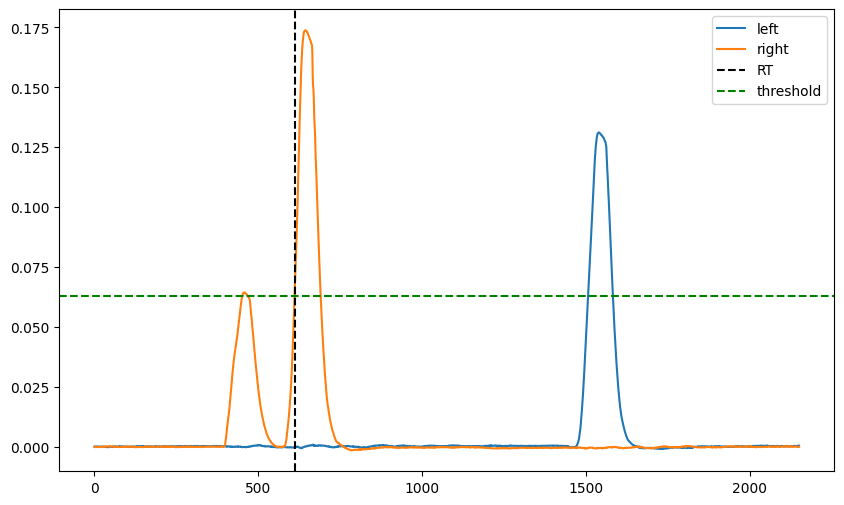

Dropped 38 epochs: 412, 421, 424, 429, 454, 648, 669, 732, 917, 1010, 1032, 1125, 1148, 1175, 1194, 1249, 1283, 1323, 1361, 1380, 1384, 1404, 1423, 1663, 1708, 1761, 1822, 1862, 1897, 1898, 1911, 1928, 2028, 2074, 2121, 2133, 2247, 2437
173 trial rejected based on threshold of 0.0001
2230 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S8_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S9_epo.fif's epoched eeg


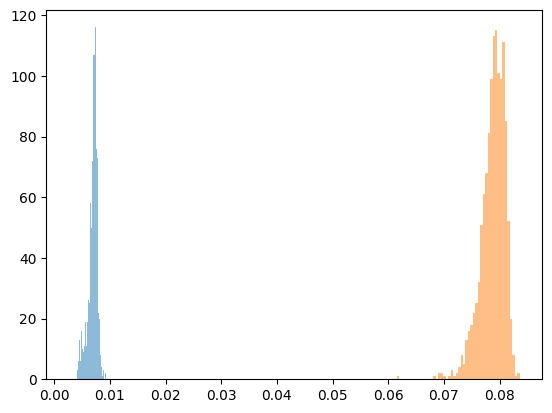

Dropped 8 epochs: 127, 831, 849, 892, 1735, 1765, 2003, 2089
14 trial rejected based on threshold of 0.0001
2426 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S9_epo.fif


In [3]:
epoch_data = hmp.utils.read_mne_data(
    subj_files,
    epoched=True,
    sfreq=sfreq,
    rt_col="rt",
    scale=1,
    lower_limit_RT=0.1,
    # upper_limit_RT=2.5,
    reject_threshold=1e-4,
    high_pass=1,
    verbose=False,
    subj_idx=subj_names,
    offset_after_resp=0.25,
    offset_before_stim=0.25,
    drop_force=True,
)
# Change epoch_data.offset to 0.05 seconds (12 samples), and add epoch_data.extra_offset with remainder
tmp_offset = epoch_data.offset
epoch_data = epoch_data.assign_attrs({'offset': 0, 'extra_offset': tmp_offset - 0})

In [4]:
epoch_data.to_netcdf(DATA_PATH / 'sat2/data_250hz.nc')

#### DEPRECATED

In [ ]:
# cpus = multiprocessing.cpu_count()
# print(cpus)
# cpus = 1  # if not enough RAM to load all participants data, better reduce the number of processes

force_id = {"low": 1, "high": 2}
stim_id = {
    "accuracy/left/1": 211,
    "accuracy/left/2": 212,
    "accuracy/left/3": 213,
    "accuracy/right/1": 221,
    "accuracy/right/2": 222,
    "accuracy/right/3": 223,
    "speed/left/1": 111,
    "speed/left/2": 112,
    "speed/left/3": 113,  # conditions in the experiment
    "speed/right/1": 121,
    "speed/right/2": 122,
    "speed/right/3": 123,
}  # used for segmentation
resp_id = {"r_left": 100, "r_right": 200}  # Response events
# COMmenting low out might filter out low but also might mess up later
event_id = {
    "low/accuracy/left/1": 1211,
    "low/accuracy/left/2": 1212,
    "low/accuracy/left/3": 1213,
    "low/accuracy/right/1": 1221,
    "low/accuracy/right/2": 1222,
    "low/accuracy/right/3": 1223,
    "low/speed/left/1": 1111,
    "low/speed/left/2": 1112,
    "low/speed/left/3": 1113,  # conditions in the experiment
    "low/speed/right/1": 1121,
    "low/speed/right/2": 1122,
    "low/speed/right/3": 1123,
    "high/accuracy/left/1": 2211,
    "high/accuracy/left/2": 2212,
    "high/accuracy/left/3": 2213,
    "high/accuracy/right/1": 2221,
    "high/accuracy/right/2": 2222,
    "high/accuracy/right/3": 2223,
    "high/speed/left/1": 2111,
    "high/speed/left/2": 2112,
    "high/speed/left/3": 2113,  # conditions in the experiment
    "high/speed/right/1": 2121,
    "high/speed/right/2": 2122,
    "high/speed/right/3": 2123,
}

sfreq = 250  # For resampling

eeg_path = DATA_PATH / "sat2/preprocessed_500hz/"
subj_names = [
    x.split("_")[0] for x in os.listdir(eeg_path)
]  # in x and 'S14' not in x] #pbm with
subj_names = [subj for subj in subj_names]
subj_names.sort()
subj_files = [str(eeg_path) + "/" + x + "_epo.fif" for x in subj_names]
# Filter out first two participants for testing

#### ALL PARTICIPANTS

In [ ]:
epoch_data

In [2]:
epoch_data = xr.load_dataset(DATA_PATH / 'sat2/data_250hz.nc')

In [4]:
new_data = epoch_data.where(epoch_data['force'] == 'low', drop=True)

In [5]:
new_data.to_netcdf(DATA_PATH / 'sat2/data_250hz_low.nc')

In [ ]:
# CHECK IF S14 loaded in has significantly less trials (25%)

In [ ]:
# save_file = "epoch_data_FEEG_500Hz.nc"
events_corrected = []
epoch_data = []
#subset subj_files for smaller group
for participant in tqdm(subj_files):
    raw = mne.io.read_raw_fif(participant, preload=False, verbose=False)
    events = mne.find_events(raw, verbose=False)
    events[:, 2] = events[:, 2] - events[:, 1]  # correct events values
    i = 0
    while i < len(events):
        if events[i, 2] in force_id.values():  # if events is condition trigger
            events[i + 1, 2] = int(
                str(events[i, 2]) + str(events[i + 1, 2])
            )  # places condition trigger on stimulus trigger (no photodiode used yet)
            events[i, 2] = 0
            i += 2
        else:
            i += 1
    events_values = np.concatenate(
        [
            np.array([x for x in event_id.values()]),
            np.array([x for x in resp_id.values()]),
        ]
    )
    events_wresp = np.array([list(x) for x in events if x[2] in events_values])
    events_corrected.append(events_wresp)
    # print("Starting mp now")
    epoch_data_participant = hmp.utils.read_mne_data(
        pfiles=participant,
        event_id=event_id,
        resp_id=resp_id,
        epoched=False,
        sfreq=sfreq,
        subj_idx=None,
        metadata=None,
        events_provided=events_wresp,
        rt_col="rt",
        rts=None,
        verbose=True,
        tmin=-0.25,
        tmax=2.5,
        offset_after_resp=0.30,
        offset_before_stim=0.25,
        high_pass=1,
        low_pass=None,
        pick_channels="eeg",
        baseline=(None, 0),
        upper_limit_RT=2.5,
        lower_limit_RT=0.25,
    )
    epoch_data.append(epoch_data_participant)
del events, events_wresp, events_values, events_corrected

epoch_data = xr.concat(
    epoch_data,
    pd.Series(subj_names, name="participant"),
    fill_value={"event": "", "data": np.nan},
)
# Change epoch_data.offset to 0.05 seconds (12 samples), and add epoch_data.extra_offset with remainder
tmp_offset = epoch_data.offset
epoch_data = epoch_data.assign_attrs({'offset': 12, 'extra_offset': tmp_offset - 12})

In [9]:
epoch_data.to_netcdf(DATA_PATH / 'sat2/data_250hz_filtered.nc')

#### FIRST NINE

In [18]:
epoch_data.to_netcdf(DATA_PATH / 'sat2/data_250hz_part1.nc')

In [ ]:
epoch_data_sat1 = xr.load_dataset(DATA_PATH / 'sat1/data_100hz.nc')
epoch_data_sat1

In [8]:
# epoch_data = epoch_data.sel(channels=epoch_data_sat1.channels)
epoch_data.to_netcdf(DATA_PATH / 'sat2/data_part2.nc')

### Load both and merge

In [ ]:
data1 = xr.load_dataset(Path("../data/sat2/data_part1.nc"))
data2 = xr.load_dataset(Path("../data/sat2/data_part2.nc"))
data = xr.concat([data1, data2], dim="participant")
data.to_netcdf(Path("../data/sat2/data.nc"))